# Machine Learning Lab -2
# LAB 2 - KMeans Clustering  

<hr/>

**Submitted by:-** <br>

Name: **Fathimathul Susna ShoukkathAli** <br>
Register Number: **23122014** <br>
Class: **3MSc Data Science** <br>

<hr/>


# Lab Overview
<hr/>





## Objective

<hr/>


 - Understanding the Dataset and Features such that to Perform the Questions provided.
 - Getting familiar with various formulas applied on hte Dataset.
 - Cleaning the dataset and modifying the Dataset.
 - Performing hands on Experience on Visualization of Different Dataset.

  
<hr/> 

## Approach

<hr/>

- Importing all the necessary Libraries

- Pre- Processing the data to get the overall idea and inference from the provided California Housing Dataset.

- Perform EDA which gives Inference on the dataset.

- Graphical Visualization has performed.

- Performing KMeans California Housing Dataset.

- Implementing K-Means using sklearn library.

- Plotting the result of K-Means using Scatterplot



<hr/>

## Sections
<hr/>

#### For this lab, the sections are: -

1. Lab Overview.
1. References.
1. Illustrate KMeans Clustering on California Housing Dataset.
1. Using Elbow Method as a way to find Optimum Number of Clusters.
1. Conclusion.

<hr/>

## References
#### Here are the links which I refered:-

<hr/>

1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

2. https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

3. https://www.askpython.com/python/examples/plot-k-means-clusters-python

4. https://www.geeksforgeeks.org/k-means-clustering-introduction/

5. https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html







In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA


KeyboardInterrupt: 

### To get away Warnings

<hr/>

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
# Importing the dataset

data = pd.read_csv("housing.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Preliminary Analysis:

### Displaying the first few rows of the dataset.

<hr/>

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.shape

(20640, 10)

### Displaying the General Information

<hr/>

In [ ]:
# Checking the datatypes 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Inference:

**Most of the columns does not carry null values except total_bedrooms We will handle the missing values in the Missing Values handling section.**

### Describe  dataset to understand the range and distribution of each feature.

<hr/>


In [ ]:
# Statistical Analysis
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Inference:

**The longitude and latitude ranges from -124.35 to -119.56 and 32.54 to 35.63 respectively. The housing mean has an average of approximately of 28.64 years, spans from a minimum of 1 year indicates very new buildings to a maximum of 52 years indicating older buildings. The rooms ranges from 2 to 2635 within the block followed with the bedrooms ranging from 1 to 537 bedrooms. The population is of minimum 3 and the average with around 1425. The household count of 1 indicates blocks with very few household potentially representing sparsely populated whereas maximum household count of 6082 represents blocks with a high concentration of households indicating densely populated areas. The median income inferes with the income  households within a block of houses which ranges from 0.49 to 3.87 (measured in tens of thousands of US Dollars). The median house value ranges from 1499 to 206855.82.**


## Visualization
### Create histograms for each numerical feature to understand the distribution.

<hr/>


**Since there are numerical features as Longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value.**

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

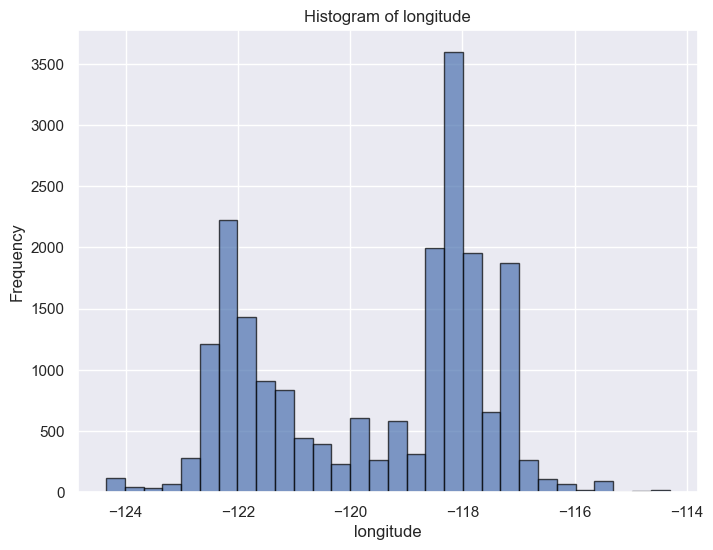

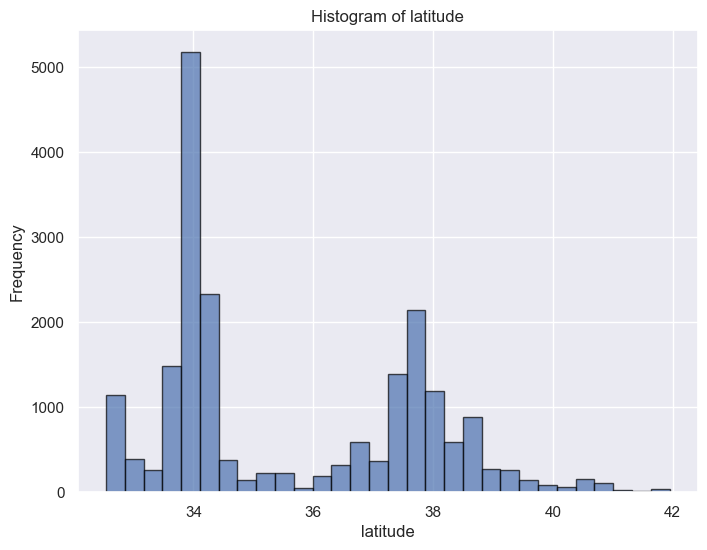

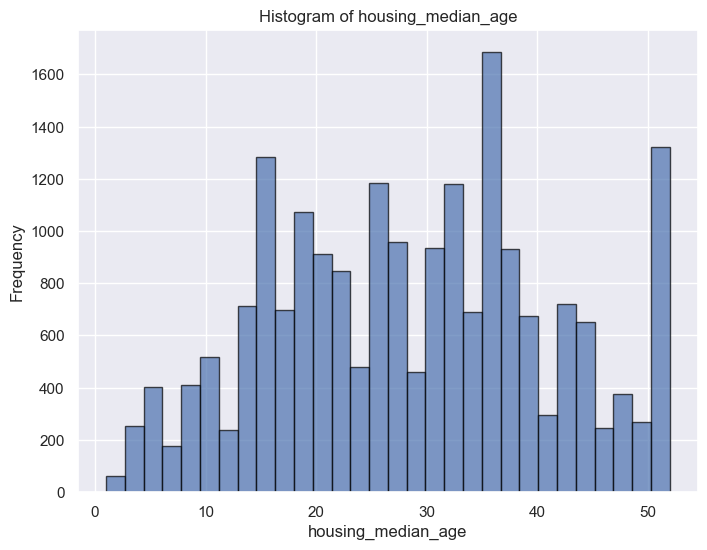

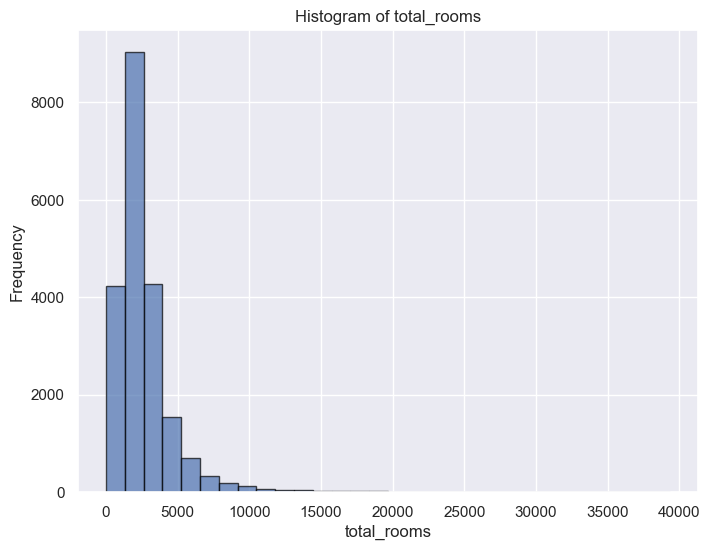

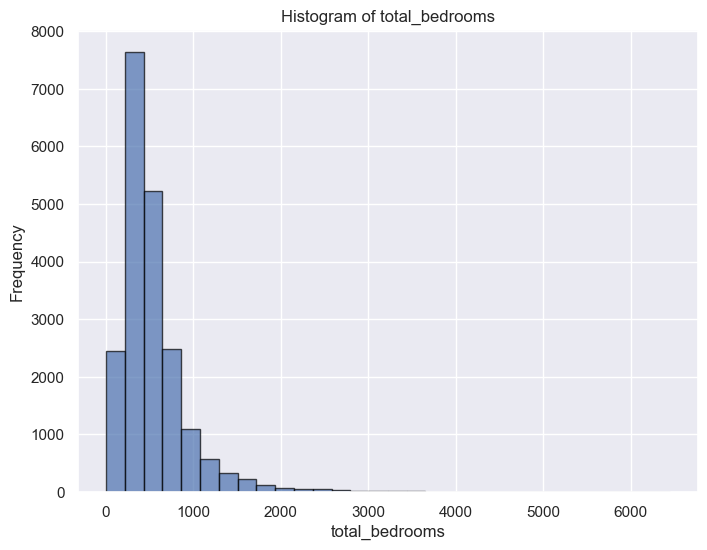

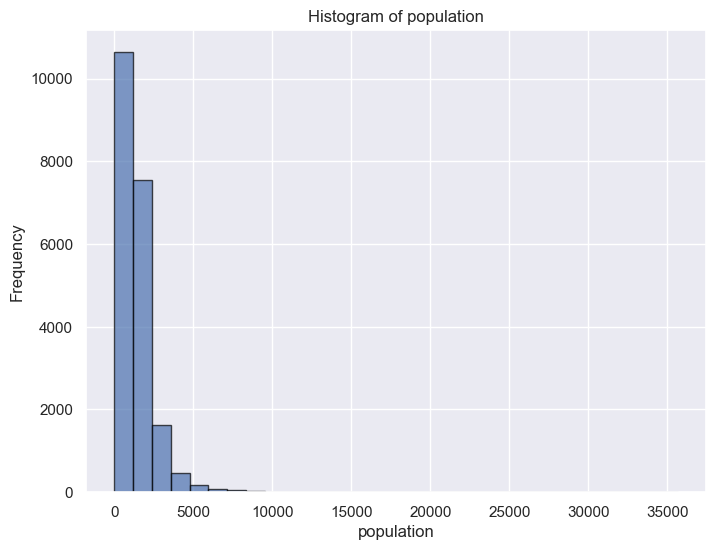

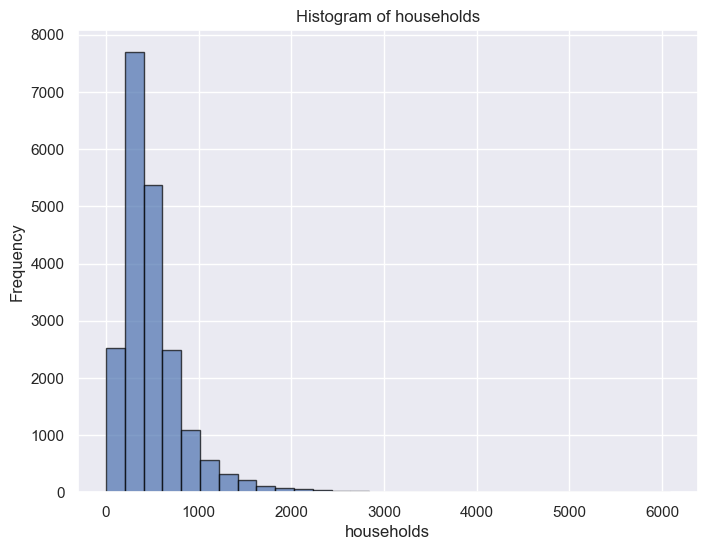

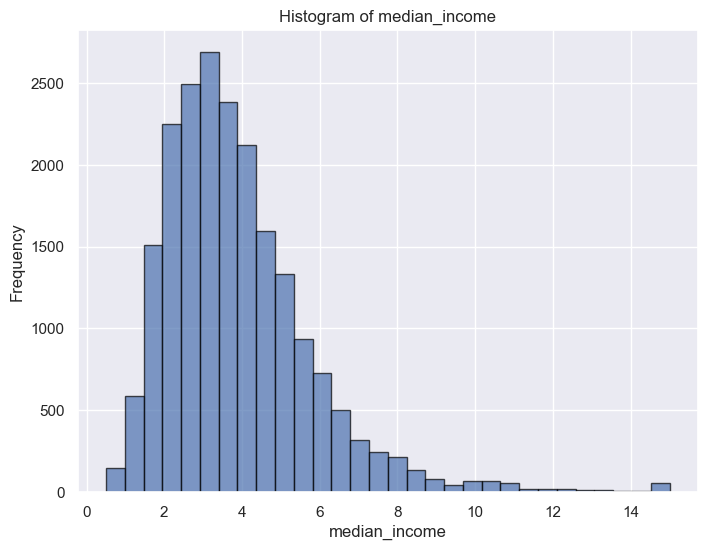

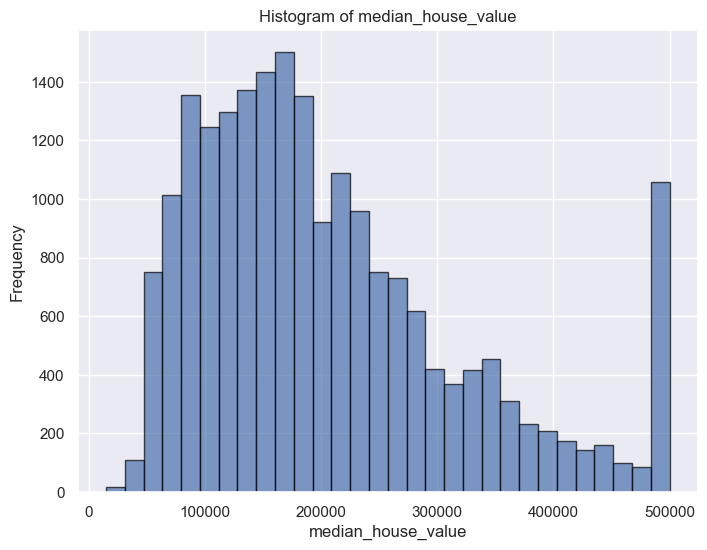

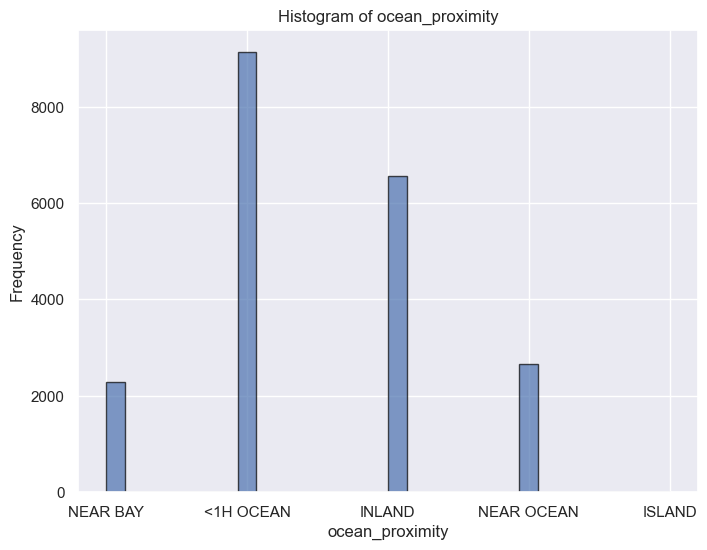

In [ ]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

for column in data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(column)  
    plt.ylabel('Frequency')  
    plt.title(f'Histogram of {column}') 
    plt.show() 

## Preliminary Analysis:

### Displaying the first few rows of the dataset.

<hr/>

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Shape of the dataset (Number of rows and columns)

print("The dataset dimensions:", data.shape)

The dataset dimensions: (20640, 10)


### Displaying the General Information

<hr/>

In [ ]:
# Checking the datatypes 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isnull().count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20640
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

### Dealing with the Null Values

In [ ]:

mean_value = data["total_bedrooms"].mean()
data["total_bedrooms"].fillna(mean_value,inplace = True)
print("Sum of total_bedrooms : ", data['total_bedrooms'].isnull().sum())

Sum of total_bedrooms :  0


In [ ]:
data.isnull().count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20640
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [ ]:
data['ocean_proximity'] = data['ocean_proximity'].map({'NEAR BAY':0,'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'ISLAND':4})

In [ ]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.004060
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004060,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


## Problem Definition

## Question: 1
-----------------------------
### Perform KMeans Clustering on the previously given dataset itself.

### Dropping Unnecessary Columns

In [ ]:
x = data.iloc[:,[5,8]] # 1t for rows and second for columns
x

,population,median_house_value
0,322.0,452600.0
1,2401.0,358500.0
2,496.0,352100.0
3,558.0,341300.0
4,565.0,342200.0
...,...,...
20635,845.0,78100.0
20636,356.0,77100.0
20637,1007.0,92300.0
20638,741.0,84700.0


In [ ]:
Y = data.iloc[:,9:] # 1t for rows and second for columns
Y.head(10)

,ocean_proximity
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


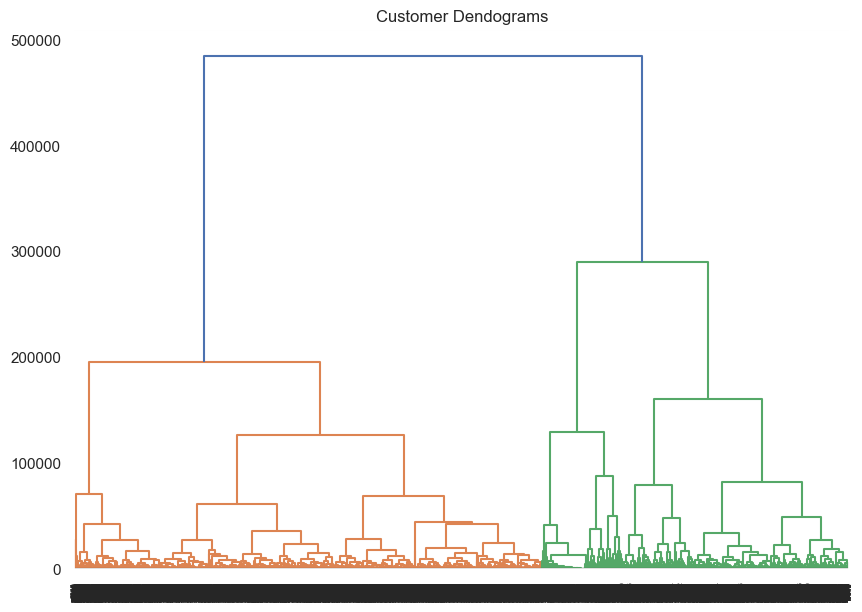

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='complete'))

max_d=7.08
plt.axhline(y=max_d,c="k")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
kmeans.predict([[0, 0], [12, 3]])

array([0, 0])

In [ ]:
kmeans.cluster_centers_

array([[  1452.19801525, 149726.49815983],
       [  1350.51530236, 367121.25092183]])

In [ ]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 0, 0, 0])

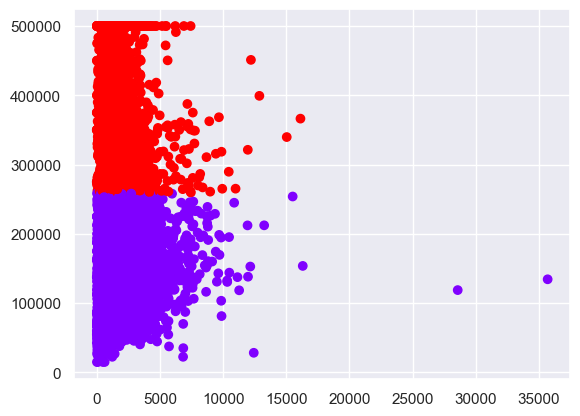

In [ ]:
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['population'],data_with_clusters['median_house_value'],c=data_with_clusters['Clusters'],cmap='rainbow')

## Problem Definition

## Question: 2
-----------------------------
### Change the value 'k', from 2 to 5, and perform Cluster Analysis on each of the predicted clusters. In cluster analysis, features of the predicted clusters are looked into such that the properties of those clusters are then identified.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

# Normalizing the data so that the data approximately# follows a Gaussian distribution
# follows a Gaussian distribution
data_normalized = normalize(data_scaled)

# Converting the numpy array into a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized)

In [ ]:
pca = PCA(n_components = 2)
data_principal = pca.fit_transform(data_normalized)
data_principal = pd.DataFrame(data_principal)
data_principal.columns = ['P1', 'P2']

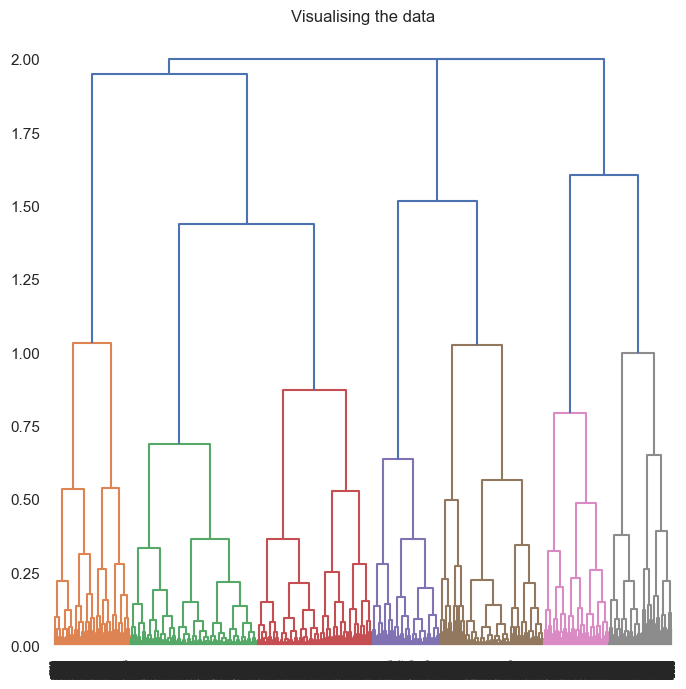

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data_principal, method ='complete')))

### K=2

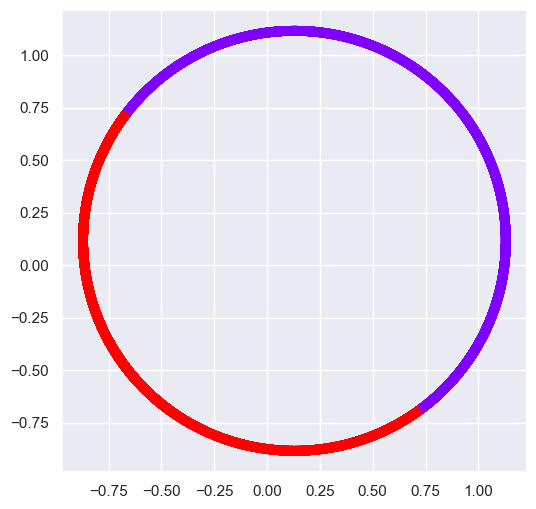

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_principal['P1'], data_principal['P2'],c = ac2.fit_predict(data_principal), cmap ='rainbow')
plt.show();

### K=3

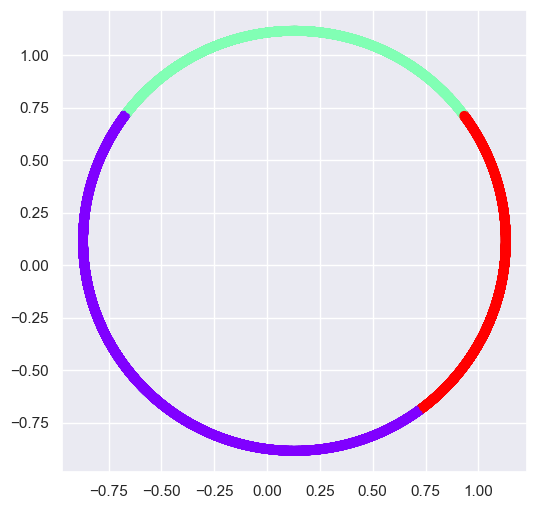

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_principal['P1'], data_principal['P2'],c = ac3.fit_predict(data_principal), cmap ='rainbow')
plt.show();

### K=4

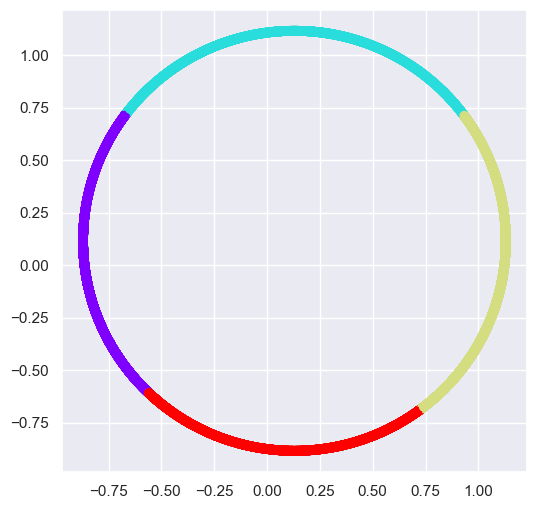

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_principal['P1'], data_principal['P2'],c = ac4.fit_predict(data_principal), cmap ='rainbow')
plt.show();

### K=5

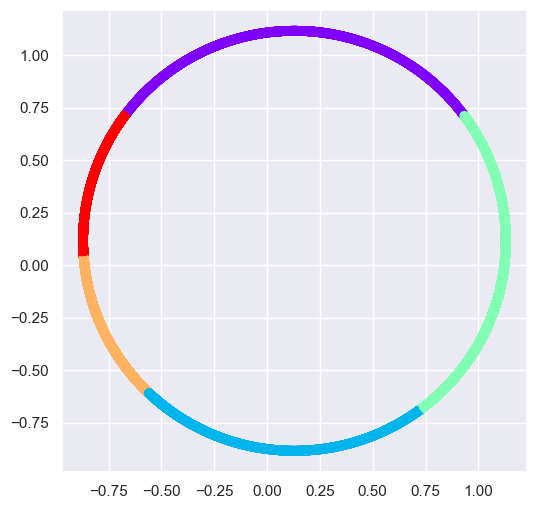

In [ ]:
ac5 = AgglomerativeClustering(n_clusters = 5)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_principal['P1'], data_principal['P2'],c = ac5.fit_predict(data_principal), cmap ='rainbow')
plt.show();

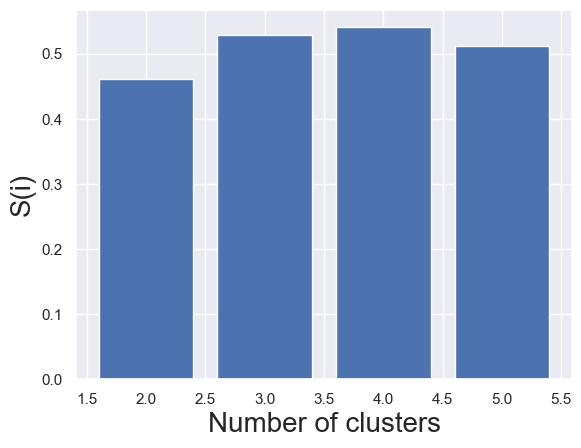

In [ ]:
k = [2, 3, 4, 5]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(data_principal, ac2.fit_predict(data_principal)))
silhouette_scores.append(silhouette_score(data_principal, ac3.fit_predict(data_principal)))
silhouette_scores.append(silhouette_score(data_principal, ac4.fit_predict(data_principal)))
silhouette_scores.append(silhouette_score(data_principal, ac5.fit_predict(data_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

### Interpretation


##### The silhouette analysis calculates the similarity to its own cluster and separation (from other clusters) in relation to each other. Dense and well-separated clusters are indicated by higher silhouette scores. It is implied that the K=2 and K=3 clusters are more compact and well-separated if their silhouette scores are higher than those of the other values of K.


## Problem Definition

## Question: 3
-----------------------------
### Demonstrate the usage of Elbow Method to find the Optimum Number of Cluster.

Text(0, 0.5, 'WCSS')

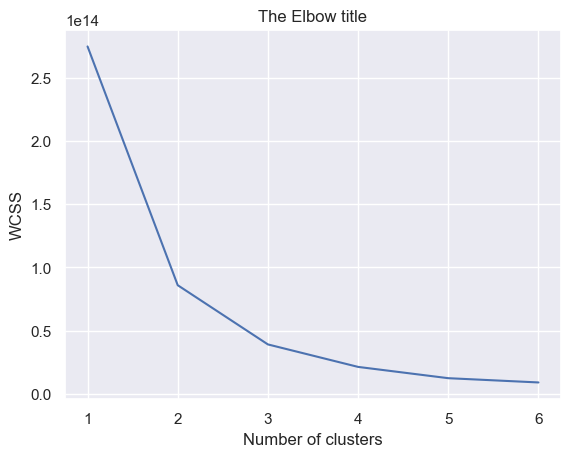

In [ ]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### Interpretation

##### With the Elbow method we could conclude the number of clusters are 2 and 3 which are optimum.